<div >
<img src = "Files/figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](Files/data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos. 
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [184]:
import pandas as pd
a = pd.read_csv("Files/data/artists.dat",delimiter='\t')
u = pd.read_csv('Files/data/user_artists.dat',delimiter='\t')
artistas = a.rename(columns={'id':'artistID'})
artistas = artistas.rename(columns={'name':'artistName'})
usuarios = u.rename(columns={'weight':'nro_reproducciones'})

In [185]:
#Unimos ambas tablas desde artistID
merged_df = pd.merge(artistas, usuarios)
merged_df

,artistID,artistName,url,pictureURL,userID,nro_reproducciones
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,34,212
1,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,274,483
2,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,785,76
3,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg,135,1021
4,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg,257,152
...,...,...,...,...,...,...
92829,18741,Diamanda Galás,http://www.last.fm/music/Diamanda+Gal%C3%A1s,http://userserve-ak.last.fm/serve/252/16352971...,454,301
92830,18742,Aya RL,http://www.last.fm/music/Aya+RL,http://userserve-ak.last.fm/serve/252/207445.jpg,454,294
92831,18743,Coptic Rain,http://www.last.fm/music/Coptic+Rain,http://userserve-ak.last.fm/serve/252/344868.jpg,454,287
92832,18744,Oz Alchemist,http://www.last.fm/music/Oz+Alchemist,http://userserve-ak.last.fm/serve/252/29297695...,454,286


Tenemos un Dataset con 92834 registros (filas) y 6 atributos (columnas).

### 2. Análisis preliminar. 

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?


In [186]:
print("En la base tenemos {} usuarios.".format(len(merged_df['userID'].unique())))
print("En la base tenemos {} artistas.".format(len(merged_df['artistID'].unique())))

En la base tenemos 1892 usuarios.
En la base tenemos 17632 artistas.



#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

In [188]:
# Utilice este espacio para escribir el código.
artist_consumption = merged_df.groupby('artistID')['userID'].count().reset_index()
artist_consumption.columns = ['artistID', 'usuarios']
total_consumptions = artist_consumption['usuarios'].sum()
artist_consumption['probabilidad'] = artist_consumption['usuarios'] / total_consumptions
artist_consumption

,artistID,usuarios,probabilidad
0,1,3,0.000032
1,2,12,0.000129
2,3,3,0.000032
3,4,2,0.000022
4,5,2,0.000022
...,...,...,...
17627,18741,1,0.000011
17628,18742,1,0.000011
17629,18743,1,0.000011
17630,18744,1,0.000011


In [189]:
artist_consumption_nro_rep = merged_df.groupby('artistID')['nro_reproducciones'].sum().reset_index()
artist_consumption_nro_rep.columns = ['artistID', 'total_reproducciones']
total_reproducciones_total = artist_consumption_nro_rep['total_reproducciones'].sum()
artist_consumption_nro_rep['probabilidad_ponderada'] = artist_consumption_nro_rep['total_reproducciones'] / total_reproducciones_total
artist_consumption_nro_rep

,artistID,total_reproducciones,probabilidad_ponderada
0,1,771,0.000011
1,2,8012,0.000116
2,3,775,0.000011
3,4,563,0.000008
4,5,913,0.000013
...,...,...,...
17627,18741,301,0.000004
17628,18742,294,0.000004
17629,18743,287,0.000004
17630,18744,286,0.000004


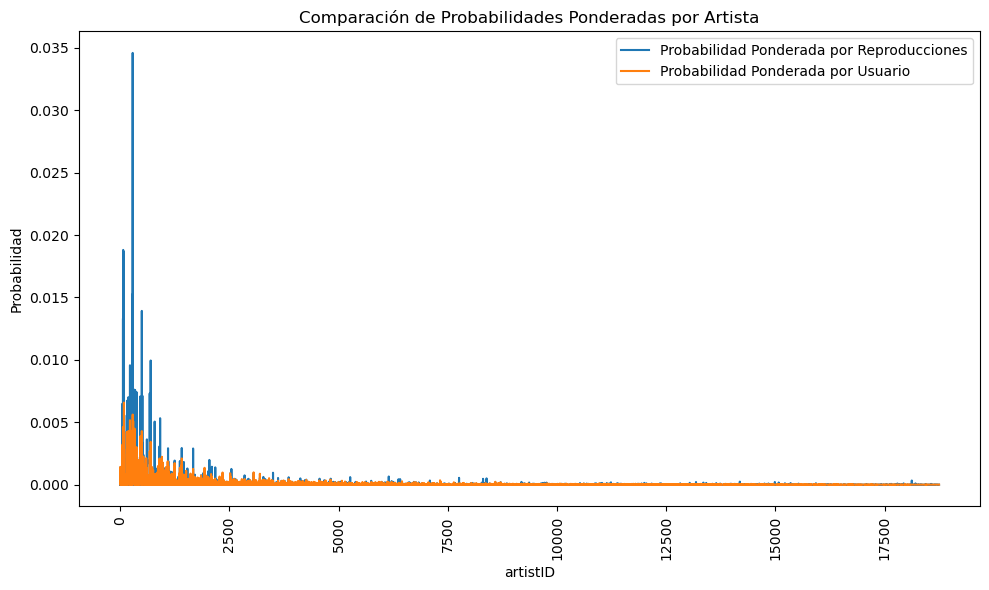

In [190]:
artist_ids = artist_consumption['artistID']
probabilidad_ponderada_reproducciones = artist_consumption_nro_rep['probabilidad_ponderada']
probabilidad_ponderada_usuario = artist_consumption['probabilidad']

plt.figure(figsize=(10, 6))  

# Grafica la probabilidad ponderada por número de reproducciones como una línea
plt.plot(artist_ids, probabilidad_ponderada_reproducciones, label='Probabilidad Ponderada por Reproducciones')

# Grafica la probabilidad ponderada por usuario como otra línea
plt.plot(artist_ids, probabilidad_ponderada_usuario, label='Probabilidad Ponderada por Usuario')

# Etiqueta los ejes y el título
plt.xlabel('artistID')
plt.ylabel('Probabilidad')
plt.title('Comparación de Probabilidades Ponderadas por Artista')

# Rotación de etiquetas en el eje X para mejor legibilidad
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout() 
plt.show()

Es evidente que la distribución de probabilidad realizada por numero de reproducciones es mucho mas grande en magnitud, la media se ve desplazada hacia la derecha y es menos uniforme que la que no se pondera.

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


In [191]:
df_user8 = merged_df[merged_df['userID'] == 8]
df_user8.sort_values(by='nro_reproducciones', ascending=False)

,artistID,artistName,url,pictureURL,userID,nro_reproducciones
19523,334,No Angels,http://www.last.fm/music/No+Angels,http://userserve-ak.last.fm/serve/252/61126961...,8,6291
19528,335,Sandy,http://www.last.fm/music/Sandy,http://userserve-ak.last.fm/serve/252/61835829...,8,2396
13176,289,Britney Spears,http://www.last.fm/music/Britney+Spears,http://userserve-ak.last.fm/serve/252/60126439...,8,2258
19530,336,Vanessa Petruo,http://www.last.fm/music/Vanessa+Petruo,http://userserve-ak.last.fm/serve/252/57670865...,8,1735
14742,295,Beyoncé,http://www.last.fm/music/Beyonc%C3%A9,http://userserve-ak.last.fm/serve/252/61958009...,8,1425
19531,337,Alexander,http://www.last.fm/music/Alexander,http://userserve-ak.last.fm/serve/252/56191985...,8,1407
15139,296,Sugababes,http://www.last.fm/music/Sugababes,http://userserve-ak.last.fm/serve/252/12353825...,8,1039
19532,338,Queensberry,http://www.last.fm/music/Queensberry,http://userserve-ak.last.fm/serve/252/49220935...,8,963
3294,89,Lady Gaga,http://www.last.fm/music/Lady+Gaga,http://userserve-ak.last.fm/serve/252/47390093...,8,921
19534,339,Fady Maalouf,http://www.last.fm/music/Fady+Maalouf,http://userserve-ak.last.fm/serve/252/10946343...,8,819


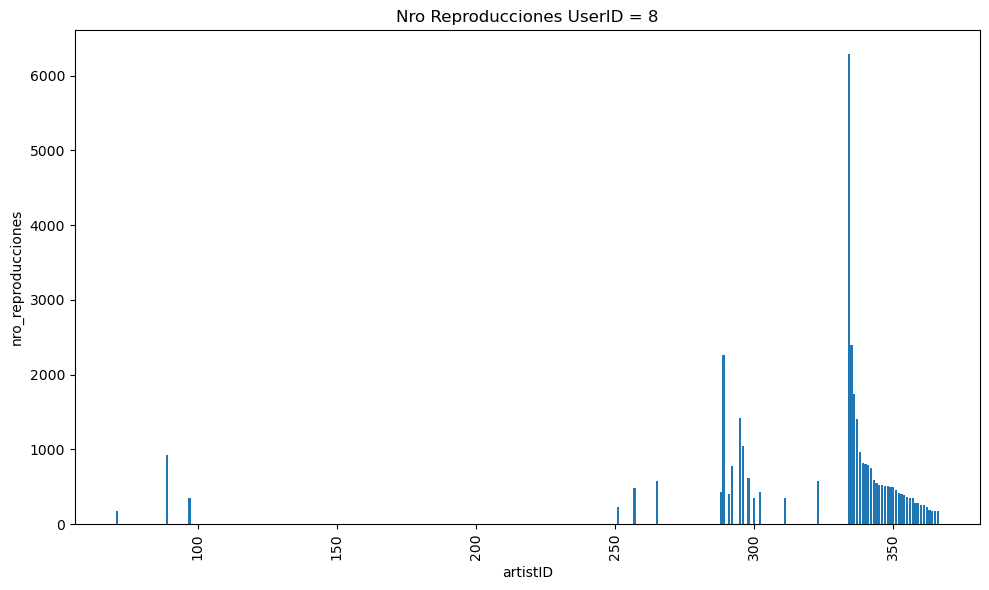

In [192]:
plt.figure(figsize=(10, 6))  
plt.bar(df_user8['artistID'], df_user8['nro_reproducciones'])

# Etiqueta los ejes y el título
plt.xlabel('artistID')
plt.ylabel('nro_reproducciones')
plt.title('Nro Reproducciones UserID = 8')

# Rotación de etiquetas en el eje X para mejor legibilidad
plt.xticks(rotation=90)
plt.tight_layout() 
#plt.xlim(0, 2500)
#plt.ylim(0, 2500)
plt.show()

Inicialmente podemos identificar una preferencia dominante por el artista 334 (No Angels) y además se identifica que sus preferencias a nivel general siguen el patrón de la población total. Es decir, sus gustos por artistas estan centrados cerca a la media de la distribución de probabilidad del dataset inicial(0 < artistID < 2500). 

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

In [195]:
df_prom_simple = artist_consumption.drop(columns='probabilidad')
df_prom_simple['promedio_simple'] = df_prom_simple['usuarios']/df_prom_simple['usuarios'].sum()
df_prom_simple

,artistID,usuarios,promedio_simple
0,1,3,0.000032
1,2,12,0.000129
2,3,3,0.000032
3,4,2,0.000022
4,5,2,0.000022
...,...,...,...
17627,18741,1,0.000011
17628,18742,1,0.000011
17629,18743,1,0.000011
17630,18744,1,0.000011


In [153]:
min_usuarios_metrica_pers = (df_prom_simple[df_prom_simple['artistID'] == 334].iloc[:,1].values[0]/df_prom_simple['usuarios'].sum() + 
                             df_prom_simple[df_prom_simple['artistID'] == 335].iloc[:,1].values[0]/df_prom_simple['usuarios'].sum() + 
                             df_prom_simple[df_prom_simple['artistID'] == 289].iloc[:,1].values[0]/df_prom_simple['usuarios'].sum())/3
print("Minimo promedio simple de usuarios que debe tener un artista para ser recomendado: {}".format(min_usuarios_metrica_pers))

Minimo promedio simple de usuarios que debe tener un artista para ser recomendado: 0.0018994477598006478


In [196]:
df_prom_simple_filtrado = df_prom_simple[df_prom_simple['promedio_simple'] >= min_usuarios_metrica_pers]
df_prom_simple_filtrado = df_prom_simple_filtrado[~df_prom_simple_filtrado['artistID'].isin(df_user8['artistID'].unique())]
recomendacion_simple = df_prom_simple_filtrado.sort_values(by=['promedio_simple'], ascending=False).iloc[:10,:]
recomendacion_simple.reset_index()

,index,artistID,usuarios,promedio_simple
0,221,227,480,0.005171
1,61,67,429,0.004621
2,327,333,417,0.004492
3,184,190,400,0.004309
4,492,498,399,0.004298
5,148,154,393,0.004233
6,59,65,369,0.003975
7,460,466,362,0.003899
8,695,701,319,0.003436
9,223,229,304,0.003275


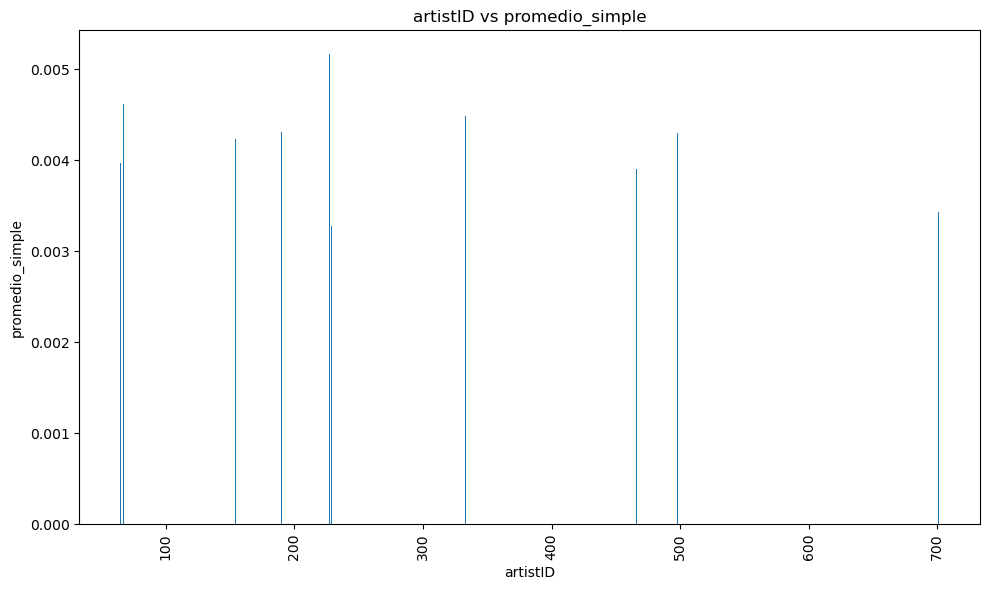

In [197]:
plt.figure(figsize=(10, 6))  
plt.bar(recomendacion_simple['artistID'], recomendacion_simple['promedio_simple'])

# Etiqueta los ejes y el título
plt.xlabel('artistID')
plt.ylabel('promedio_simple')
plt.title('artistID vs promedio_simple')

# Rotación de etiquetas en el eje X para mejor legibilidad
plt.xticks(rotation=90)
plt.tight_layout() 
#plt.xlim(0, 2500)
#plt.ylim(0, 2500)
plt.show()

**!!!!!!!!-->EXPLICAR MUY BIEN LA METRICA UTILIZADA COMO PISO PARA SCORE ARTISTAS<--!!!!!!!**

#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Usando el promedio ponderado basado en el número de usuarios que escucha un artista  y ponderando  por el número de veces que estos usuarios reproducen al artista (`nro_reproducciones`) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.


In [202]:
# Construimos los dos datasets base para armar el dataset con la suma ponderada de reproducciones y usuarios.
# Df No1 
df = merged_df.drop(columns=['artistName', 'url', 'pictureURL']).copy()
df = df.groupby('artistID')['userID'].count().reset_index()
df.columns = ['artistID', 'usuarios']

# Df No2
df2 = merged_df.groupby('artistID')['nro_reproducciones'].sum().reset_index()
df2.columns = ['artistID', 'total_reproducciones']

# Df concatenado
df['total_reproducciones'] = df2['total_reproducciones']
df['suma_ponderada'] =  (df['total_reproducciones'] * df['usuarios']) / df['usuarios'].sum()

In [201]:
# Escogemos como metrica de piso de suma ponderada el percentil 95%
min_suma_ponderada = df['suma_ponderada'].quantile(0.95)
min_suma_ponderada = round(min_suma_ponderada)
print("El minimo valor de suma ponderada aceptado es: {}".format(min_suma_ponderada))

El minimo valor de suma ponderada aceptado es: 2


In [203]:
# Aplicamos el filtro de metrica escogido. Retiramos los artistas que el usuario 8 ya escucha y ordenamos 
# de forma descendente la suma ponderada para recomendar los 10 primeros.
df_recomendacion_ponderada = df[df['suma_ponderada'] >= min_suma_ponderada]
df_recomendacion_ponderada = df_recomendacion_ponderada[~df_recomendacion_ponderada['artistID'].isin(df_user8['artistID'].unique())]
df_recomendacion_ponderada = df_recomendacion_ponderada.sort_values(by=['suma_ponderada'], ascending=False).iloc[:10,:]
print("\nArtistas recomendados para el usuario 8:\n")
df_recomendacion_ponderada


Artistas recomendados para el usuario 8:



,artistID,usuarios,total_reproducciones,suma_ponderada
61,67,429,921198,4256.995734
492,498,399,963449,4140.898281
66,72,282,1301308,3952.957494
221,227,480,662116,3423.483637
695,701,319,688529,2365.951602
327,333,417,525844,2362.032747
184,190,400,485076,2090.079066
148,154,393,385306,1631.140078
455,461,286,489065,1506.695715
460,466,362,384405,1498.961695


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

In [205]:
# Utilizando el dataset del punto anterior donde suma_ponderada = (usuarios * total_reproducciones)/total_usuarios
df

,artistID,usuarios,total_reproducciones,suma_ponderada
0,1,3,771,0.024915
1,2,12,8012,1.035655
2,3,3,775,0.025045
3,4,2,563,0.012129
4,5,2,913,0.019670
...,...,...,...,...
17627,18741,1,301,0.003242
17628,18742,1,294,0.003167
17629,18743,1,287,0.003092
17630,18744,1,286,0.003081


In [206]:
from sklearn.metrics.pairwise import cosine_similarity
df.pivot_table(values='suma_ponderada', index='artistID', columns='usuarios').fillna(0)

usuarios,1,2,3,4,5,6,7,8,9,10,...,399,400,407,417,429,473,480,484,522,611
artistID,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.024915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.025045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.012129,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.019670,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18741,0.003242,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18742,0.003167,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18743,0.003092,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


In [161]:
# Utilice este espacio para escribir el código.
merged_df

,artistID,artistName,url,pictureURL,userID,nro_reproducciones
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,34,212
1,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,274,483
2,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,785,76
3,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg,135,1021
4,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg,257,152
...,...,...,...,...,...,...
92829,18741,Diamanda Galás,http://www.last.fm/music/Diamanda+Gal%C3%A1s,http://userserve-ak.last.fm/serve/252/16352971...,454,301
92830,18742,Aya RL,http://www.last.fm/music/Aya+RL,http://userserve-ak.last.fm/serve/252/207445.jpg,454,294
92831,18743,Coptic Rain,http://www.last.fm/music/Coptic+Rain,http://userserve-ak.last.fm/serve/252/344868.jpg,454,287
92832,18744,Oz Alchemist,http://www.last.fm/music/Oz+Alchemist,http://userserve-ak.last.fm/serve/252/29297695...,454,286


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hier-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Recomendaciones generales 

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).